# Census Income project

### Data description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).
For the 'final weight' column in the dataset,  3 sets of controls are used for its determination. Those are:

- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex.

People with similar demographic characteristics should have similar weights. Here our task is to determine whether a person makes over $50K a year.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [31]:
df= pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

We can see all the columns here. Income is our target column.

In [4]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [5]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

The column 'Education num' is the encoded form of the column 'Education', hence we can drop the 'Education' column.

In [32]:
df.drop(['Education'], axis=1, inplace= True)
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA

In [7]:
df.shape

(32560, 14)

In the dataset we have 32560 rows and 14 columns to work with.

### Checking null values

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here we can see no null values present.

In [9]:
# Lets check the unique values

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Fnlwgt
[ 83311 215646 234721 ...  34066  84661 257302]
Education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_status
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Relationship
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race
[' White

In the unique values we can see there are '?' in the categories of 'occupation' and 'work class' and 'native country' columns, Those are missing values. Lets treat them.

In [33]:
# replacing ? with nan

for i in df.columns:
    df[i]= df[i].replace(' ?',np.nan)

In [11]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

The '?' have been replaced with nan. lets check null values now.

In [14]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Now we can see null values present in the dataset. lets visualize it.

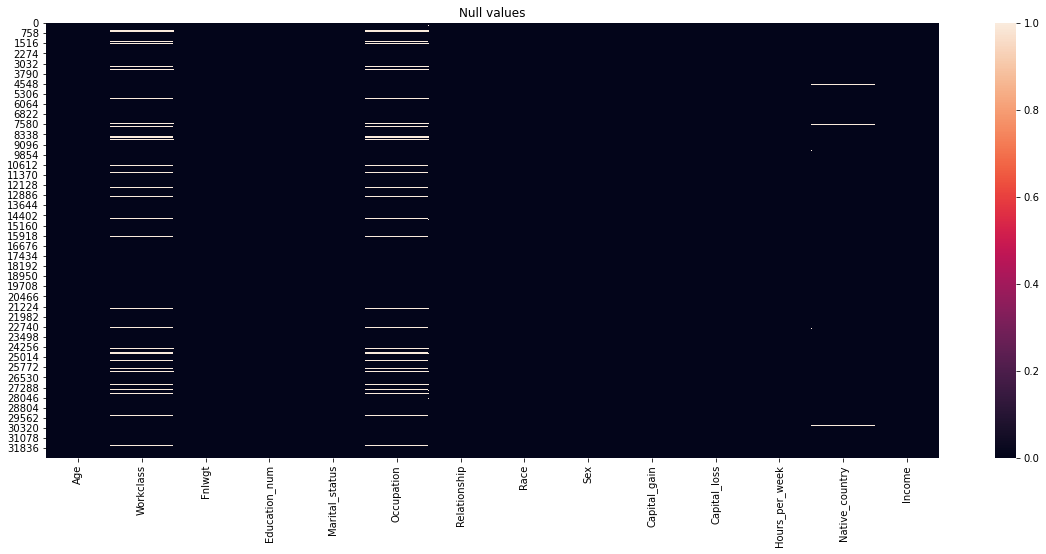

In [15]:
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization, null values can be seen in 3 columns. lets treat them.

In [34]:
# replacing null values with most frequent data.

colms=['Workclass', 'Occupation', 'Native_country']

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy= 'most_frequent')

for i in df[colms]:
    df[i]= imp.fit_transform(df[i].values.reshape(-1,1)) 

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Null values have been removed.

In [68]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can check the numeric data columns, In most of the columns some difference can be seen between mean and the median, hence the data may have skewness present.
Also the difference between the mean and the maximum is high in two columns, they are more prone to outliers.

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

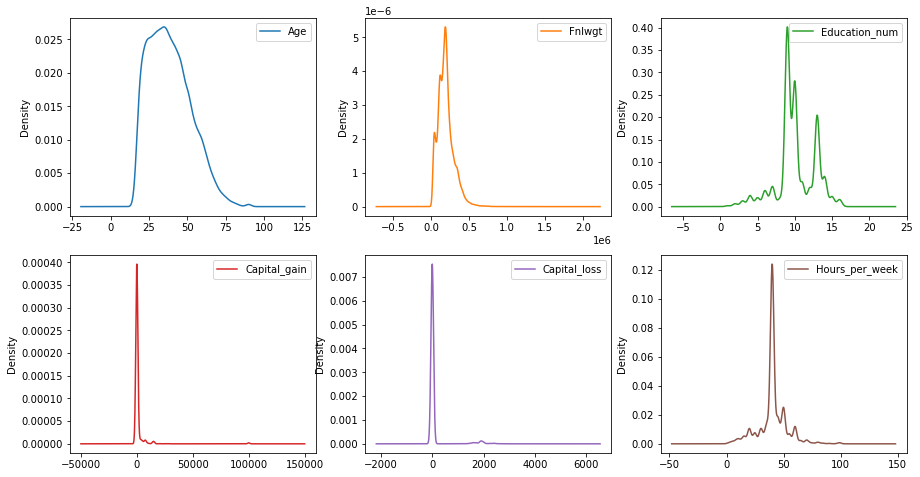

In [28]:
df.plot(kind='density', subplots= True, layout=(2,3),sharex=False, legend=True, figsize=[15,8])
plt.show

Here we can check the distribution of the numerical columns. Lets observe closely.

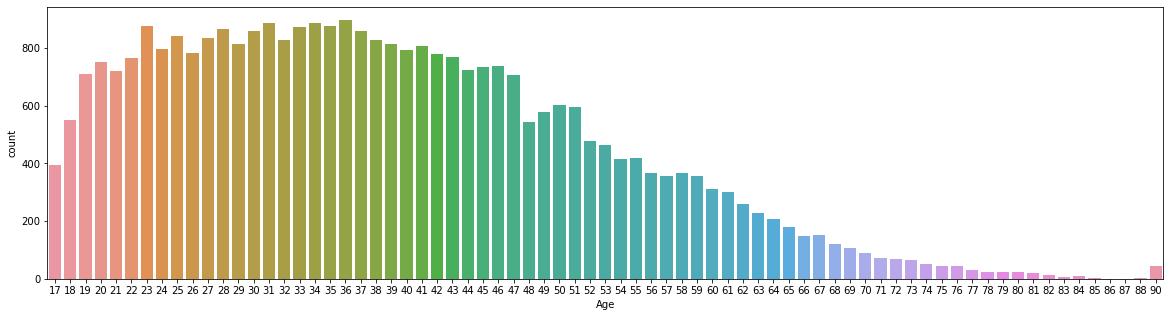

In [39]:
plt.figure(figsize=[20,5])
sns.countplot(df['Age'])
plt.show()

Data can be seen having some skewness at the end. majority of people having age between 18 to 50

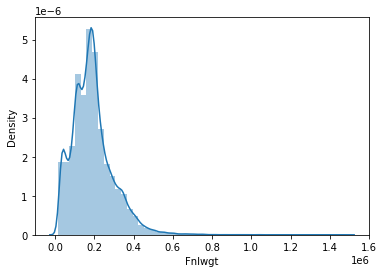

In [30]:
sns.distplot(df['Fnlwgt']);

Here we can see some variance as well as skewness, right tailes skewed.

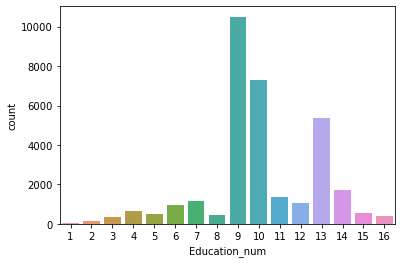

In [31]:
sns.countplot(df['Education_num']);

Majority of the persons are 'hs grad', followed by 'some college', and the least no. of people are from 'preschool'

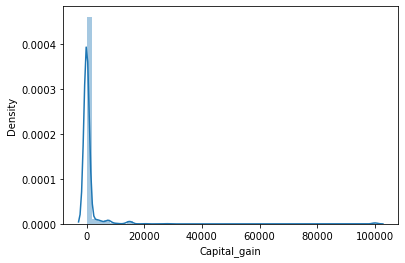

In [33]:
sns.distplot(df['Capital_gain']);

Here data can be seen having high amount of skewness, right tailed skewed with values mostly being 0.

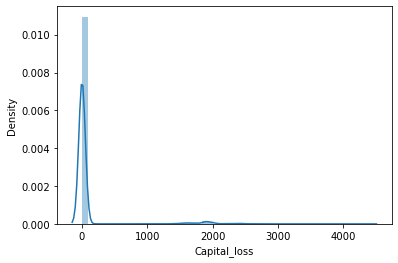

In [34]:
sns.distplot(df['Capital_loss']);

Here too data can be seen having high skewness, right tailed skew with values mostly being 0.

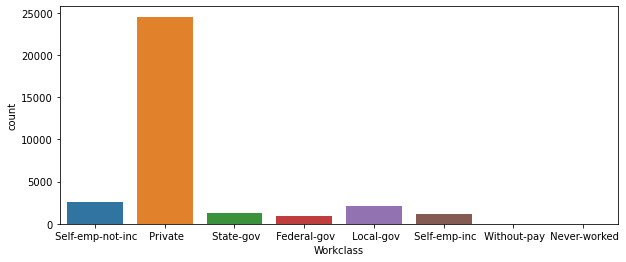

In [48]:
plt.figure(figsize=[10,4])
sns.countplot(df['Workclass'])
plt.show()

Most of the peoples work class is of 'private' sector. and 'withoutpay' and 'never worked' people are negligible.

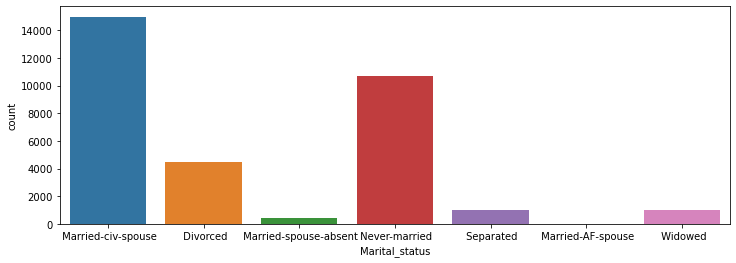

In [52]:
plt.figure(figsize=[12,4])
sns.countplot(df['Marital_status'])
plt.show()

Here 'married-civ-spouse' people are the most and 'Married-af-spouse' people are the least.

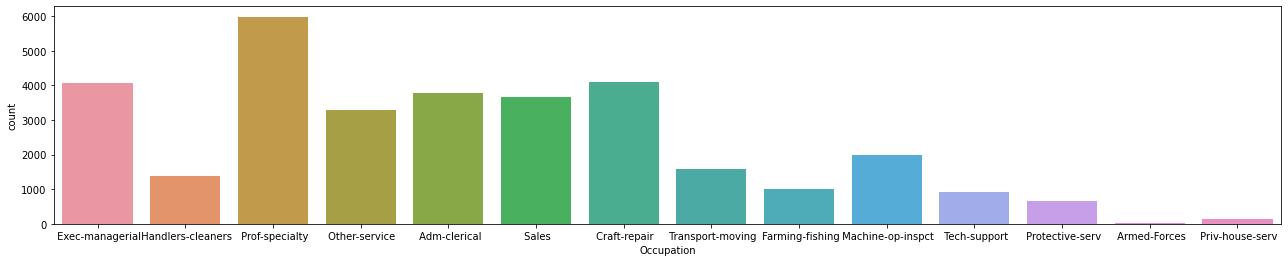

In [55]:
plt.figure(figsize=[22,4])
sns.countplot(df['Occupation'])
plt.show()

Here majority of the people are from occupation 'professional speciality', and the minimum number of people are from 'armed forces'

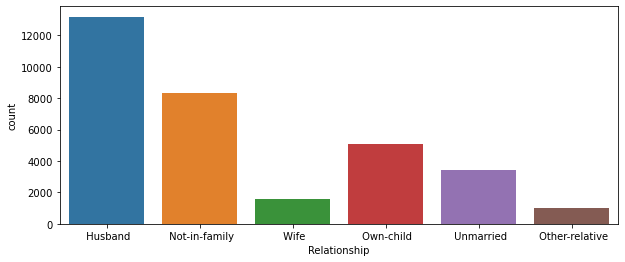

In [57]:
plt.figure(figsize=[10,4])
sns.countplot(df['Relationship'])
plt.show()

Here majority of the people have the spouse relation of 'husband' and 'other relative' being the least.

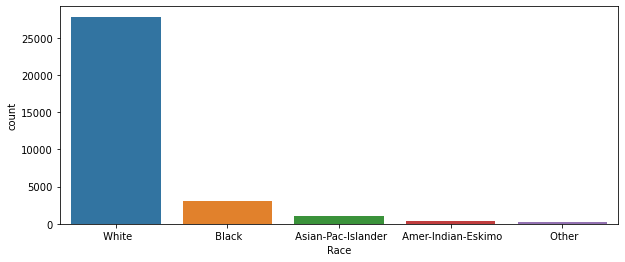

In [58]:
plt.figure(figsize=[10,4])
sns.countplot(df['Race'])
plt.show()

We can see most of the people are from 'white' race followed by 'black'

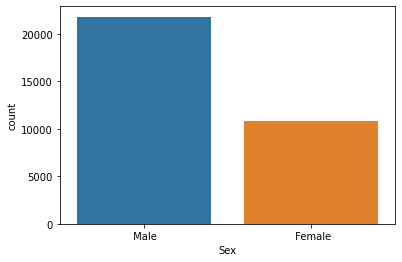

In [60]:
plt.figure(figsize=[6,4])
sns.countplot(df['Sex'])
plt.show()

Number of male in the data is more compared to female.

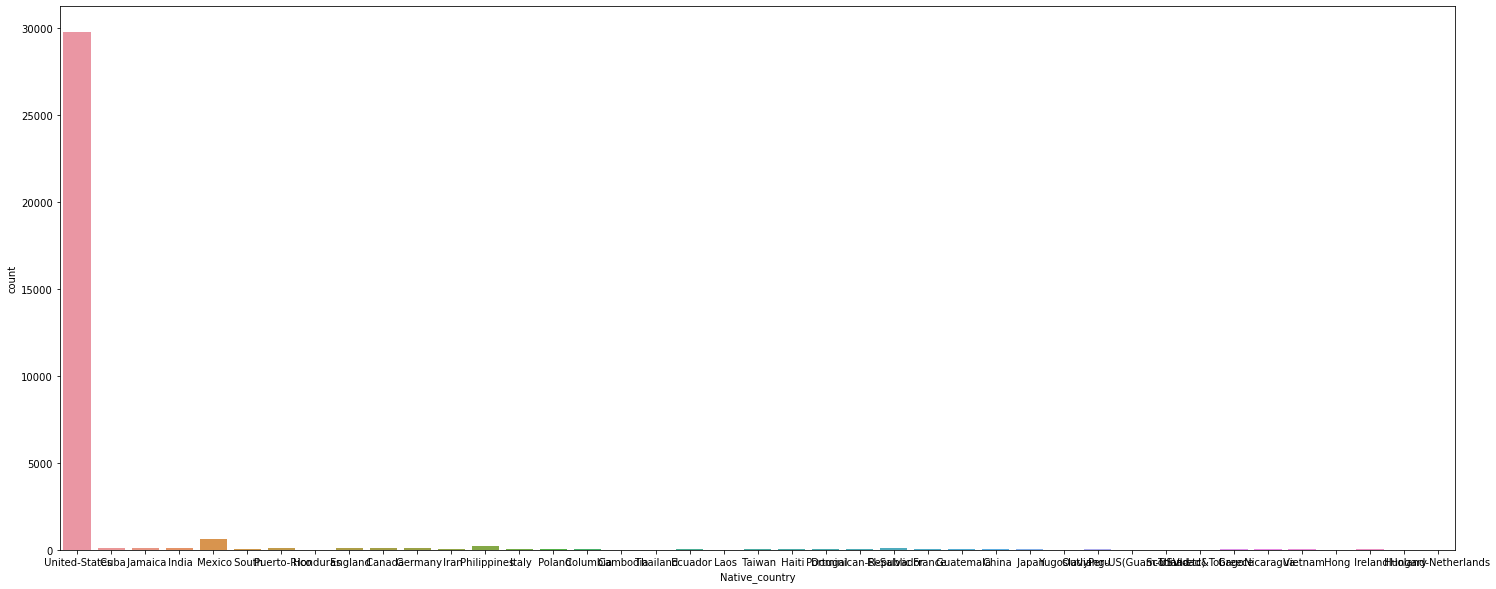

In [69]:
plt.figure(figsize=[25,10])
sns.countplot(df['Native_country'])
plt.show()

Here we can see most of the people's native country being 'US', followed by 'Mexico' and others being very less.

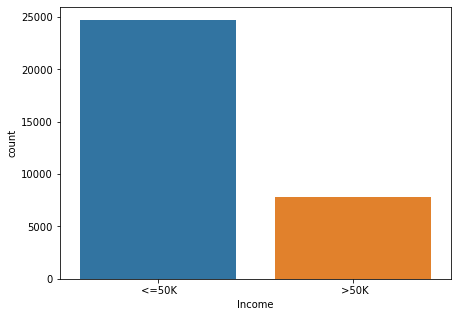

In [72]:
# Checking the target column for class imbalance.

plt.figure(figsize=[7,5])
sns.countplot(df['Income'])
plt.show()

Here we can see, more of the people have their income <=50k as compared to >50k. we can see little imbalance but it is present in considerable amount, so we can proceed with it. We need to check f1 score for the accuracy.

In [74]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Most of the categorical columns are of object datatype. we need to encode them to proceed.

In [75]:
print(df.nunique())

Age                  73
Workclass             8
Fnlwgt            21647
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64


We can see all the columns except 'fnlwgt' are categorical. as we have more than 32000 records.

In [76]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Fnlwgt
[ 83311 215646 234721 ...  34066  84661 257302]
Education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_status
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Relationship
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race
[' White' ' Black' 

In [77]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [78]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [79]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

The three columns here are in encoded form, with 'age' starting from 17. Lets encode the rest categorical data.

### Encoding

In [35]:
# encoding nominal data.

cols=['Workclass', 'Marital_status','Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

from sklearn.preprocessing import OrdinalEncoder

enc= OrdinalEncoder()

for i in df[cols]:
    df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [36]:
# encoding ordinal data.

cols=['Capital_gain', 'Capital_loss','Income']

from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()

for i in df[cols]:
    df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
1,38,3.0,215646,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
2,53,3.0,234721,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
3,28,3.0,338409,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,3.0,284582,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32556,40,3.0,154374,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32557,58,3.0,151910,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0
32558,22,3.0,201490,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0


Our dataframe is now encoded.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education_num   32560 non-null  int64  
 4   Marital_status  32560 non-null  float64
 5   Occupation      32560 non-null  float64
 6   Relationship    32560 non-null  float64
 7   Race            32560 non-null  float64
 8   Sex             32560 non-null  float64
 9   Capital_gain    32560 non-null  int64  
 10  Capital_loss    32560 non-null  int64  
 11  Hours_per_week  32560 non-null  int64  
 12  Native_country  32560 non-null  float64
 13  Income          32560 non-null  int32  
dtypes: float64(7), int32(1), int64(6)
memory usage: 3.4 MB


All out data is turned into int and float datatype. we can proceed now.

### Checking correlation

In [85]:
cor= df.corr()
cor

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.125912,0.065050,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.017189,0.007082,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,-0.003107,-0.011511,-0.018770,-0.063279,-0.009481
Education_num,0.036527,0.003445,-0.043159,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.154387,0.084175,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.075162,-0.035235,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.012963,0.008955,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.093141,-0.064286,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.024951,0.019366,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.077573,0.049549,0.229312,0.002055,0.215995
Capital_gain,0.125912,0.017189,-0.003107,0.154387,-0.075162,0.012963,-0.093141,0.024951,0.077573,1.000000,-0.056966,0.100139,0.013652,0.340034


Here we can see the correlation between all the columns, lets visualize it.

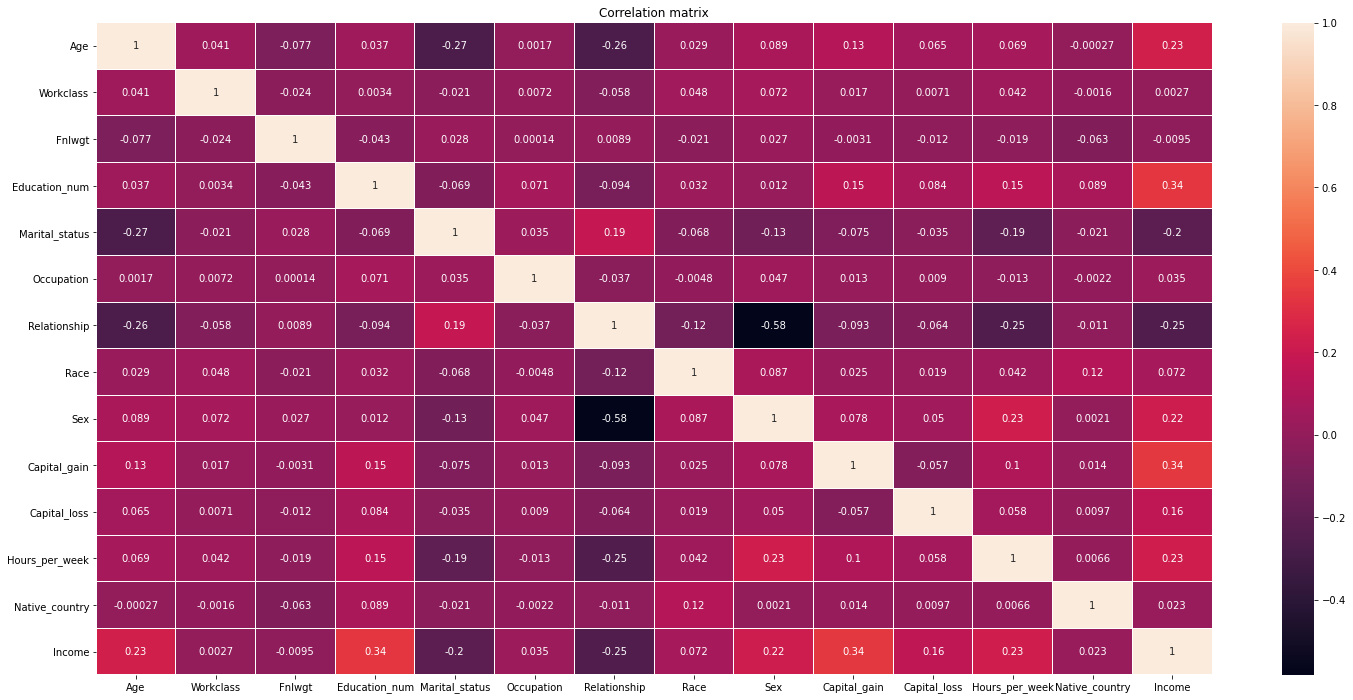

In [89]:
plt.figure(figsize=[25,12])
sns.heatmap(cor, annot=True,linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

We can see most of the columns having a weak correlation. Also there are some positive as well as negative correlation. Among the independent columns, 'relationship' and 'sex' can be seen having the most negative correlation and 'sex' and 'hours per week' have the most positive relation.

In [90]:
# checking correlation of target with independent columns.

cor['Income'].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.340034
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Sex               0.215995
Capital_loss      0.162511
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

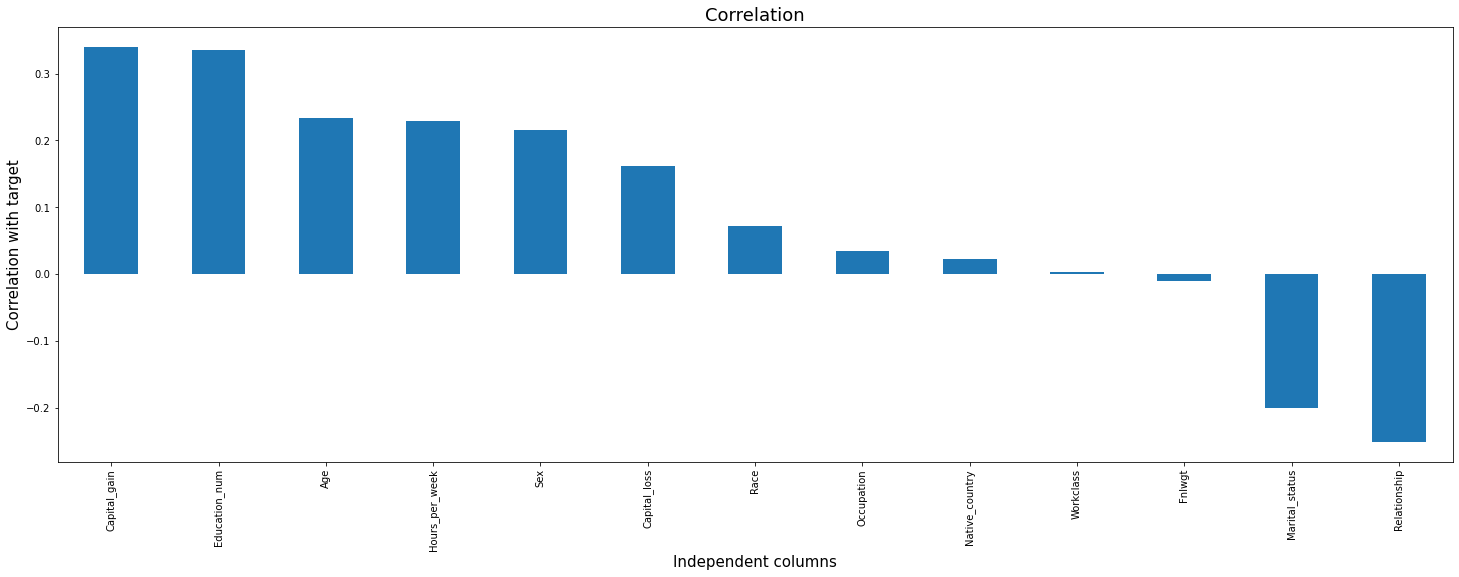

In [93]:
plt.figure(figsize=(25,8))
cor['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Independent columns',fontsize= 15)
plt.ylabel('Correlation with target',fontsize= 15)
plt.title('Correlation',fontsize= 18)
plt.show()

Through visualization we can see that the 'capital gain' and 'education' have the best correlation with the target. With 'relationship' and 'marital status' having a negative correlation. Lets analyse them closely.

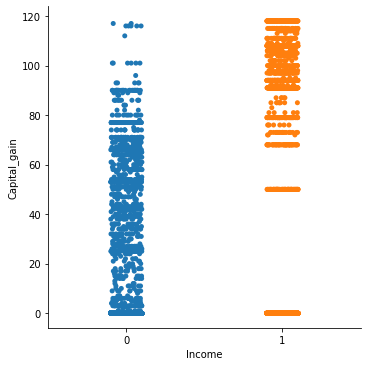

In [11]:
sns.catplot(x= 'Income',y='Capital_gain', data=df)

A positive correlation can be seen, as data points are going up as its advancing.

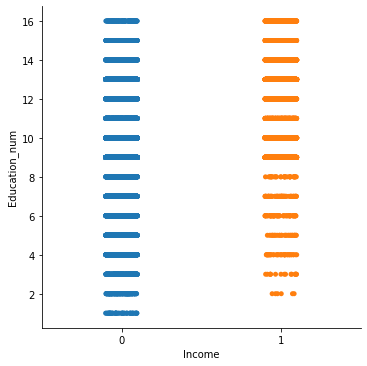

In [12]:
sns.catplot(x= 'Income',y='Education_num', data=df)

A positive relation here as well. as data points are going up.

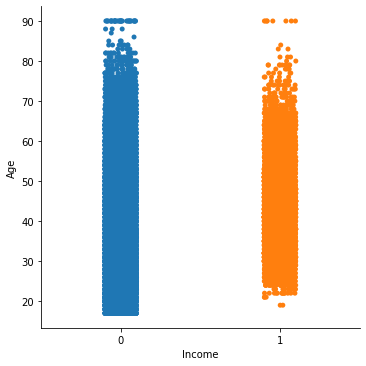

In [13]:
sns.catplot(x= 'Income',y='Age', data=df)

Here we can see some positive relation.

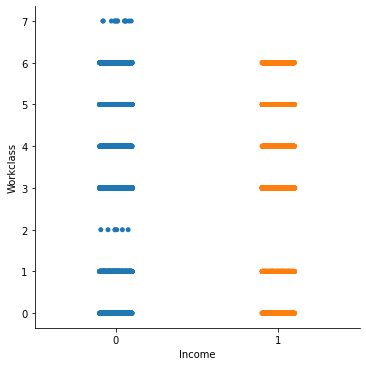

In [14]:
sns.catplot(x= 'Income',y='Workclass', data=df)

A slight negative correlation can be seen here.

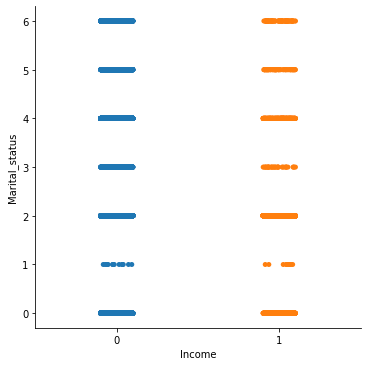

In [16]:
sns.catplot(x= 'Income',y='Marital_status', data=df)

A negative correlation can be seen here, data points getting reduced from top.

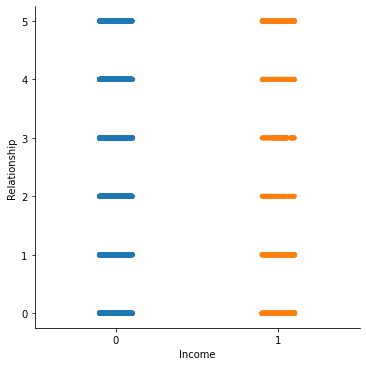

In [15]:
sns.catplot(x= 'Income',y='Relationship', data=df)

No correlation can be seen here. slight negative correlation.

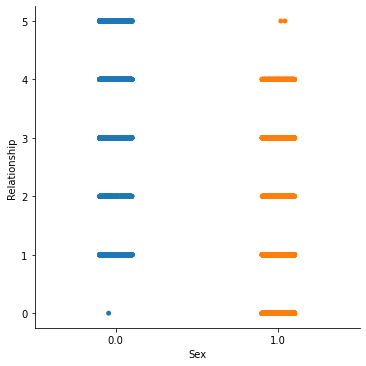

In [18]:
sns.catplot(x= 'Sex',y='Relationship', data=df)

A very negative correlation can be seen. it shows the most negative correlation among the independent columns.

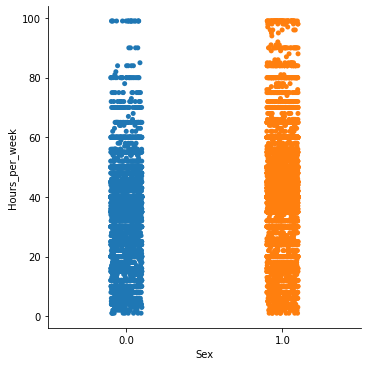

In [19]:
sns.catplot(x= 'Sex',y='Hours_per_week', data=df)

A positive correlation can be seen. The graph shows the most positive correlation among the independent columns.

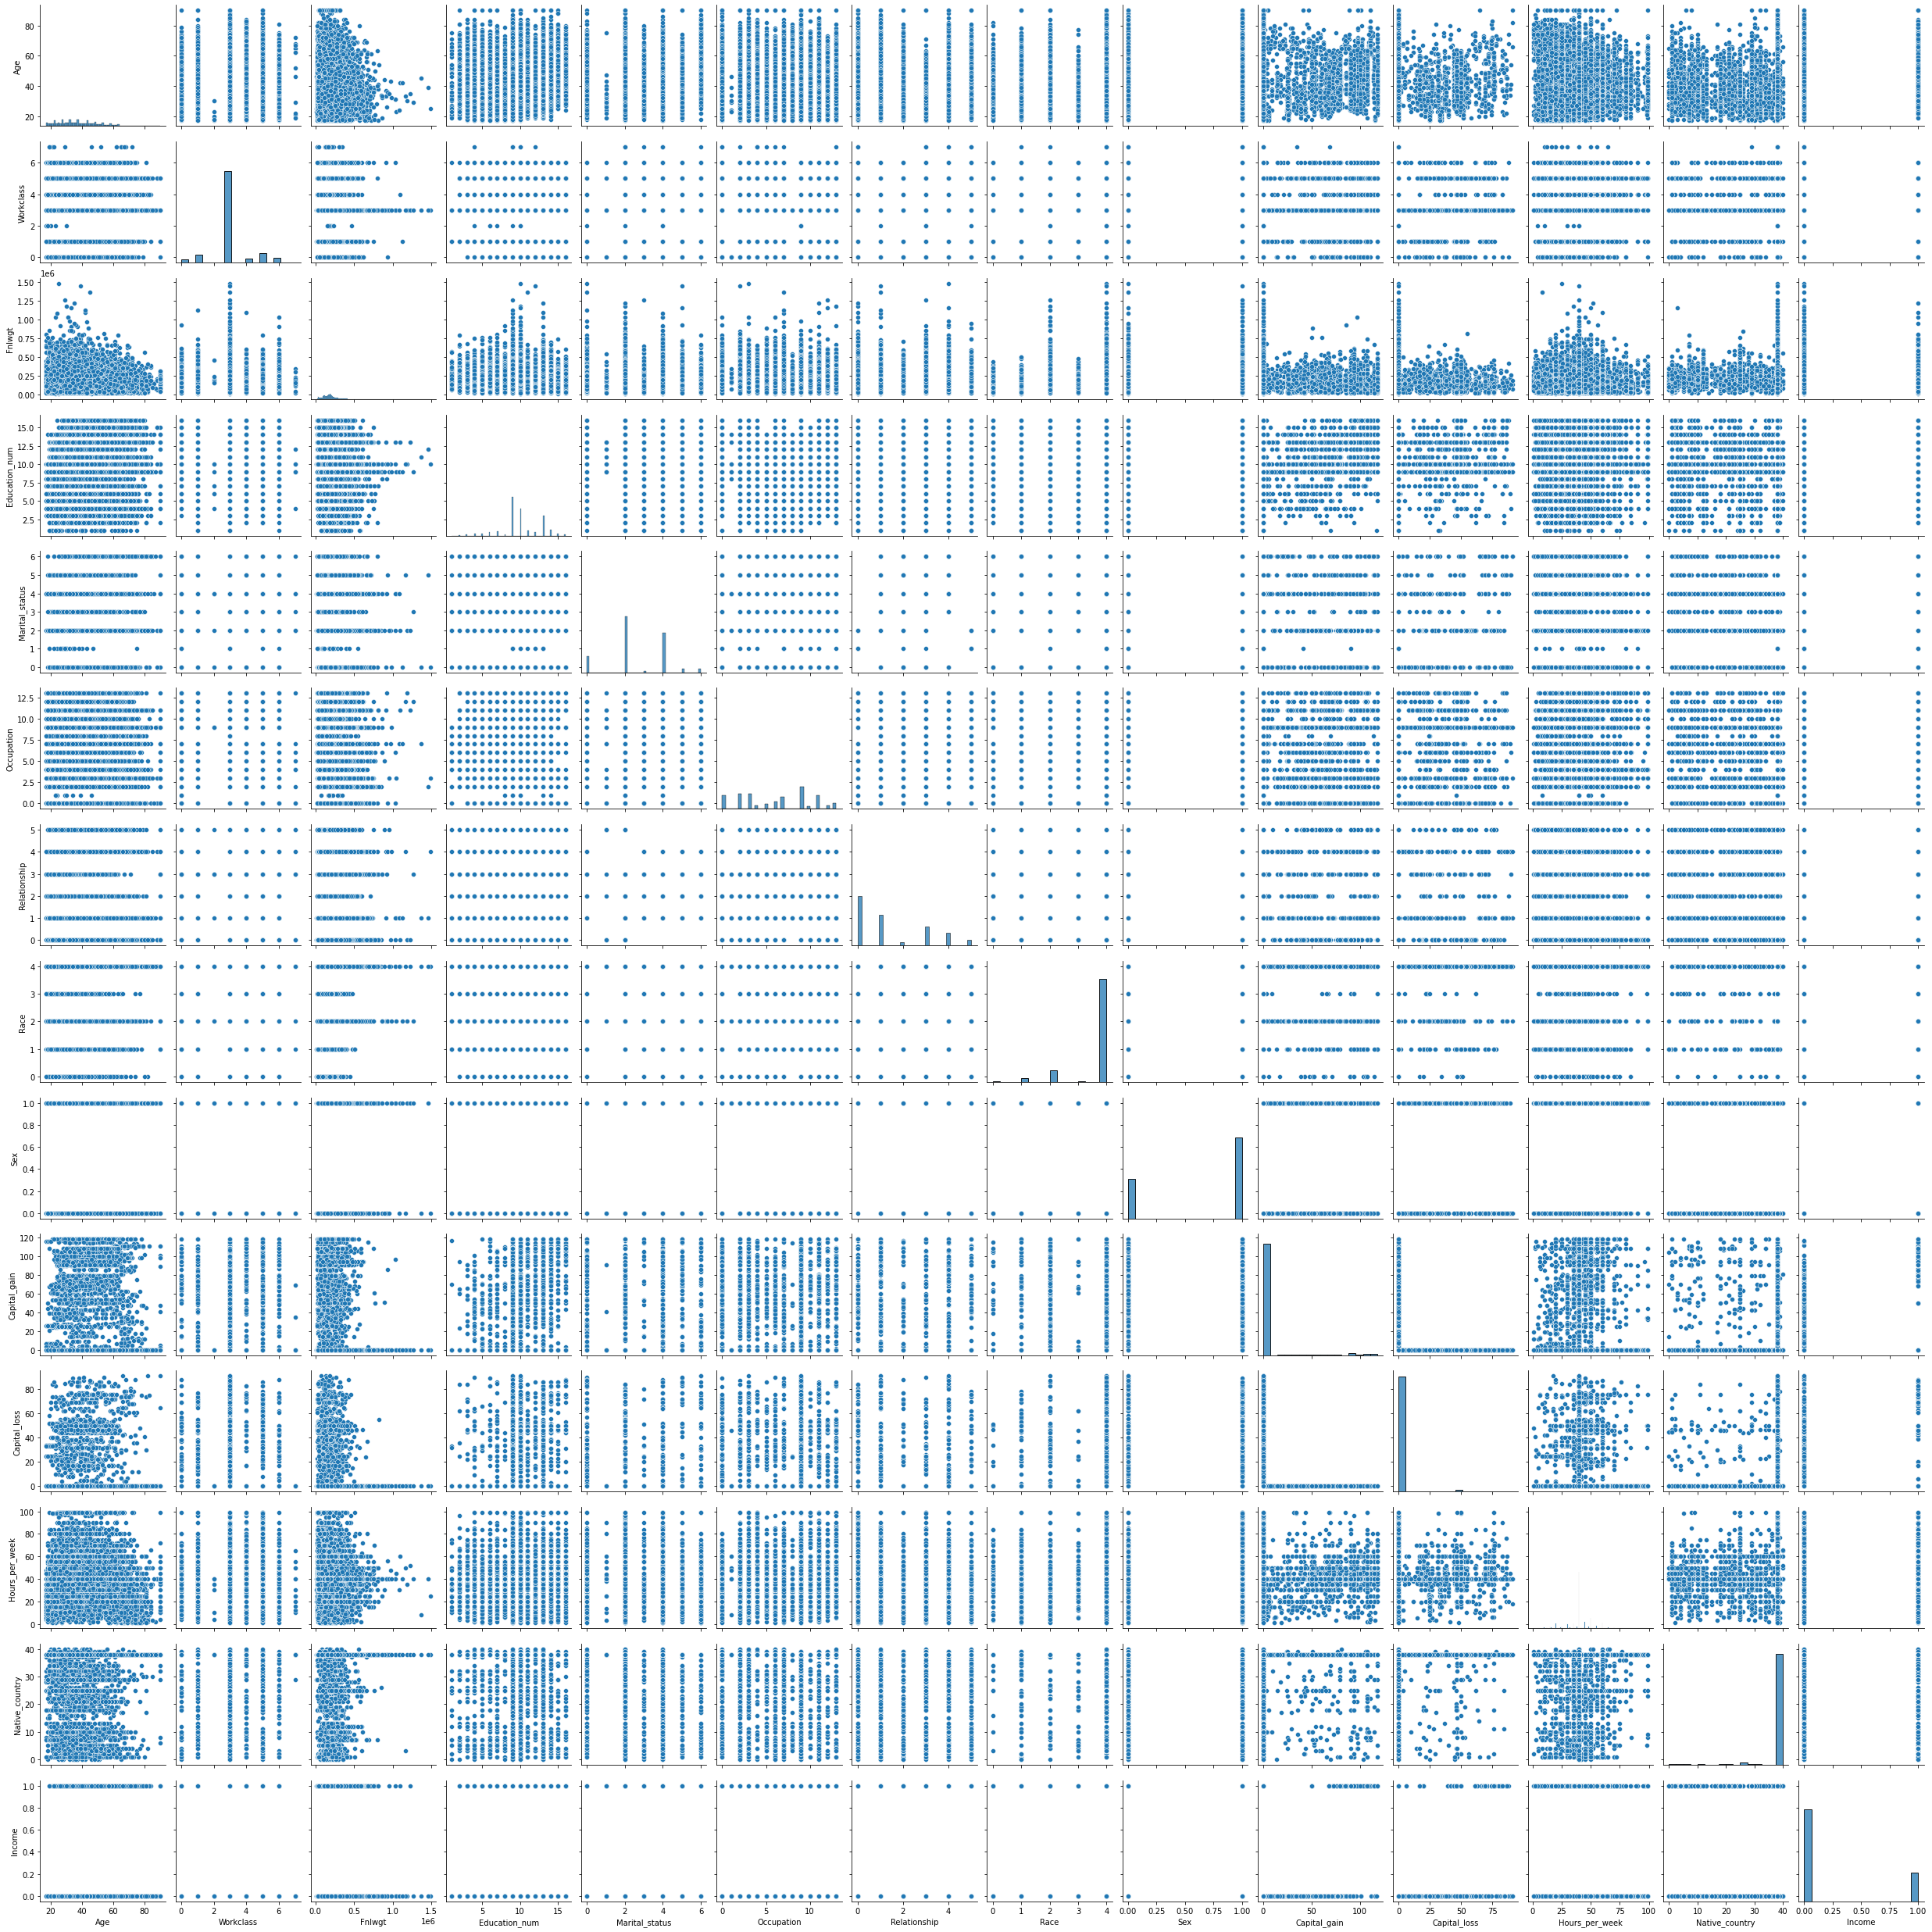

In [20]:
sns.pairplot(df);

Here we have visualized the correlation of the entire dataset. a multivariate analysis.

### Checking skewness for the continious data column

In [38]:
df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            1.446972
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.572186
Capital_loss      5.266058
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

All the columns except one are categorical, so we only treat the continious data for skewness.

In [39]:
from sklearn.preprocessing import power_transform

df['Fnlwgt']= power_transform(df['Fnlwgt'].values.reshape(-1,1))

df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            0.016914
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.572186
Capital_loss      5.266058
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

We have removed the skewness for the particular column, taking threshold of (<0.5 & >-0.5)

## Finding best random state

In [41]:
# Lets split the data first into x and y first.

x= df.drop('Income', axis=1)
y= df['Income']

In [42]:
from sklearn.linear_model import LogisticRegression

maxscr=0
maxrs=0

for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= accuracy_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
        
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.8283783783783784 on random state 53


In [43]:
# Creating train test split using best random state

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=53)

## Model creation

In [44]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print(accuracy_score(y_test,predlr),'\n')
print(confusion_matrix(y_test,predlr),'\n')
print(classification_report(y_test,predlr),'\n')

0.8283783783783784 

[[5813  398]
 [ 999  930]] 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6211
           1       0.70      0.48      0.57      1929

    accuracy                           0.83      8140
   macro avg       0.78      0.71      0.73      8140
weighted avg       0.82      0.83      0.82      8140
 



In [45]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)

print(accuracy_score(y_test,preddt),'\n')
print(confusion_matrix(y_test,preddt),'\n')
print(classification_report(y_test,preddt),'\n')

0.8175675675675675 

[[5429  782]
 [ 703 1226]] 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6211
           1       0.61      0.64      0.62      1929

    accuracy                           0.82      8140
   macro avg       0.75      0.75      0.75      8140
weighted avg       0.82      0.82      0.82      8140
 



In [46]:
from sklearn.ensemble import RandomForestClassifier

fr=RandomForestClassifier()
fr.fit(x_train,y_train)
predfr= fr.predict(x_test)

print(accuracy_score(y_test,predfr),'\n')
print(confusion_matrix(y_test,predfr),'\n')
print(classification_report(y_test,predfr),'\n')

0.8632678132678133 

[[5798  413]
 [ 700 1229]] 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6211
           1       0.75      0.64      0.69      1929

    accuracy                           0.86      8140
   macro avg       0.82      0.79      0.80      8140
weighted avg       0.86      0.86      0.86      8140
 



In [47]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
preds= svc.predict(x_test)

print(accuracy_score(y_test,preds),'\n')
print(confusion_matrix(y_test,preds),'\n')
print(classification_report(y_test,preds),'\n')

0.8213759213759214 

[[6115   96]
 [1358  571]] 

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6211
           1       0.86      0.30      0.44      1929

    accuracy                           0.82      8140
   macro avg       0.84      0.64      0.67      8140
weighted avg       0.83      0.82      0.79      8140
 



In [48]:
from sklearn.ensemble import AdaBoostClassifier

ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad= ad.predict(x_test)

print(accuracy_score(y_test,predad),'\n') 
print(confusion_matrix(y_test,predad),'\n')
print(classification_report(y_test,predad))

0.8658476658476658 

[[5839  372]
 [ 720 1209]] 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6211
           1       0.76      0.63      0.69      1929

    accuracy                           0.87      8140
   macro avg       0.83      0.78      0.80      8140
weighted avg       0.86      0.87      0.86      8140



Here Random forest and Adaboost are giving us a good f1 scores and accuracy. Lets check cv score for over and under fitting.

## Cross validation

In [49]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,scoring="f1",cv=5)
print('cross validation score for logistic reg model: ', scr.mean())

cross validation score for logistic reg model:  0.5337796444429583


In [50]:
scr= cross_val_score(dt,x,y,scoring="f1",cv=5)
print('cross validation score for decision tree model: ', scr.mean())

cross validation score for decision tree model:  0.6110630724500863


In [51]:
scr= cross_val_score(fr,x,y,scoring="f1",cv=5)
print('cross validation score for random forest model: ', scr.mean())

cross validation score for random forest model:  0.6838395579060534


In [52]:
scr= cross_val_score(svc,x,y,scoring="f1",cv=5)
print('cross validation score for support vector classifier model: ', scr.mean())

cross validation score for support vector classifier model:  0.4150597837814531


In [53]:
scr= cross_val_score(ad,x,y,scoring="f1",cv=5)
print('cross validation score for Adaboost reg model: ', scr.mean())

cross validation score for Adaboost reg model:  0.6707802681305702


Here the models Random forest and adaboost are giving us the best cv score, and the difference of cv score and f1 scores is less in both the models. We need to hyperparameter tune them both and find the best model.

## Hyper parameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV

parfr={'max_depth':np.arange(5,10), 'criterion':['gini','entropy'], 'max_features' : ["auto", "sqrt", "log2"]}

gcvfr= GridSearchCV(fr,parfr,cv=5)
gcvfr.fit(x_train,y_train)

gcvfr.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}

In [64]:
# Now using the above parameter which is found to be best, we create our model.

fr_mod= RandomForestClassifier(criterion= 'gini', max_depth= 9, max_features='auto')
fr_mod.fit(x_train,y_train)
predf1=fr_mod.predict(x_test)

print(accuracy_score(y_test,predf1))
print(confusion_matrix(y_test,predf1),'\n')
print(classification_report(y_test,predf1),'\n')

0.8613022113022113
[[5948  263]
 [ 866 1063]] 

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6211
           1       0.80      0.55      0.65      1929

    accuracy                           0.86      8140
   macro avg       0.84      0.75      0.78      8140
weighted avg       0.86      0.86      0.85      8140
 



With Random forest., we are getting an f1 score of 91% and 65% for 0 and 1, and accuracy score of 86%.

In [65]:
# Adaboost model

parad={'n_estimators' : [50,100,150,200], 'algorithm' : ['SAMME', 'SAMME.R']}

gcvad= GridSearchCV(ad,parad,cv=5)
gcvad.fit(x_train,y_train)

gcvad.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 200}

In [67]:
# Now using the above parameter which is found to be best, we create our model.

ad_mod= AdaBoostClassifier(n_estimators= 200, algorithm= 'SAMME.R')
ad_mod.fit(x_train,y_train)
predf2=ad_mod.predict(x_test)

print(accuracy_score(y_test,predf2))
print(confusion_matrix(y_test,predf2),'\n')
print(classification_report(y_test,predf2),'\n')

0.8706388206388206
[[5838  373]
 [ 680 1249]] 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6211
           1       0.77      0.65      0.70      1929

    accuracy                           0.87      8140
   macro avg       0.83      0.79      0.81      8140
weighted avg       0.87      0.87      0.87      8140
 



With Adaboost, we are getting f1 score of 92% and 70% for 0 and 1, and accuracy score of 87%

### AUC ROC Curve

In [68]:
from sklearn.metrics import plot_roc_curve

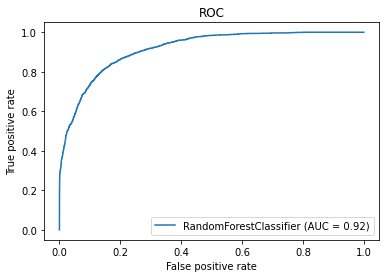

In [69]:
plot_roc_curve(fr_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

With Random forest classifier, the area under the curve is found to be 92%

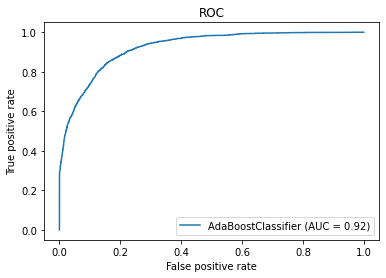

In [70]:
plot_roc_curve(ad_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

With Adaboost the area under the curve is found to be 92% as well.

By analysing both the models we have found that Adaboost classifier is giving us a better f1 score as well as accuracy score, with AUC value being the same, So we make AdaBoost classifier as our final model.

## Saving the model

In [71]:
import joblib

joblib.dump(ad_mod,'census_income.pkl')

['census_income.pkl']